In [12]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob
import os
from tqdm import tqdm
import pickle
import numpy as np
import cv2
from PIL import Image
from numpy.random import rand, randint, ranf, randn

%matplotlib inline

In [2]:
img_folder_path = "./object/training/image_2/"
label_folder_path = "./object/training/label_2/"
calib_folder_path = "./object/training/calib/"

current_directory = os.getcwd()
os.chdir(img_folder_path)
img_names = glob.glob("./*.png")
for i in range(len(img_names)):
    img_names[i] = img_names[i][2:-4]
os.chdir(current_directory)
print("tatal", len(img_names), "images for training")

tatal 7481 images for training


# アノテーションのリストをDataFrameに変換、pickleに保存

In [3]:
annotations_list = pd.DataFrame()
names = ["type", "truncated", "occluded", "alpha", "left", "top", "right", "bottom",
         "height", "width", "length", "x", "y", "z", "rotation_y", ]

for img_name in tqdm(img_names):
    label_path = label_folder_path + img_name + ".txt"
    annotations = pd.read_csv(label_path, names = names, sep='\s+')
    annotations["img_name"] = img_name
    annotations_list = annotations_list.append(annotations)
annotations_list = annotations_list[["img_name"]+names]
annotations_list.head(10)

100%|██████████| 7481/7481 [01:36<00:00, 77.24it/s] 


img_name      type  truncated  occluded  alpha    left     top    right  \
0   004863       Car       0.00         0  -1.55  572.44  181.56   611.95   
1   004863      Tram       0.00         0  -1.48  498.85  149.49   551.40   
2   004863       Car       0.00         1   2.12   56.46  195.89   220.78   
3   004863       Car       0.00         0   1.92  321.08  188.65   383.52   
4   004863  DontCare      -1.00        -1 -10.00  280.40  183.35   291.90   
0   006912       Car       0.18         0   1.92    0.00  195.17   324.83   
1   006912   Cyclist       0.00         0  -2.05  872.81  121.16  1014.69   
2   006912       Car       0.00         0   1.59  541.37  176.62   560.25   
3   006912  DontCare      -1.00        -1 -10.00  690.81  168.77   702.31   
4   006912  DontCare      -1.00        -1 -10.00  456.44  169.81   503.36   

   bottom  height  width  length        x        y        z  rotation_y  
0  219.71    1.66   1.73    3.05    -0.82     2.08    33.40       -1.57  
1  204.32    3.62   2.60   15.21    -6.27     2.16    55.58       -1.60  
2  260.91    1.47   1.71    4.36   -12.68     2.15    19.71        1.55  
3  221.93    1.52   1.71    3.89   -12.88     2.34    36.20        1.58  
4  212.56   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
0  374.00    1.49   1.67    4.52    -4.67     1.79     8.12        1.41  
1  343.30    1.98   0.50    1.72     3.25     1.52     7.30       -1.64  
2  192.09    1.51   1.81    4.07    -6.01     1.92    73.56        1.51  
3  193.81   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
4  189.64   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00

In [4]:
# annotationをpickleに保存して読み込み
with open("object/training/label_2/annotations_list.pkl", mode="wb") as f:
    pickle.dump(annotations_list, f)
annotations_list = pd.read_pickle("object/training/label_2/annotations_list.pkl")
annotations_list

img_name        type  truncated  occluded  alpha     left     top    right  \
0    004863         Car        0.0         0  -1.55   572.44  181.56   611.95   
1    004863        Tram        0.0         0  -1.48   498.85  149.49   551.40   
2    004863         Car        0.0         1   2.12    56.46  195.89   220.78   
3    004863         Car        0.0         0   1.92   321.08  188.65   383.52   
4    004863    DontCare       -1.0        -1 -10.00   280.40  183.35   291.90   
..      ...         ...        ...       ...    ...      ...     ...      ...   
4    003873    DontCare       -1.0        -1 -10.00   454.58  174.06   495.63   
5    003873    DontCare       -1.0        -1 -10.00   565.19  172.77   582.30   
6    003873    DontCare       -1.0        -1 -10.00  1151.30  170.18  1238.92   
7    003873    DontCare       -1.0        -1 -10.00   827.18  178.59   853.35   
0    001902  Pedestrian        0.0         0   0.25   396.38  141.10   439.12   

    bottom  height  width  length        x        y        z  rotation_y  
0   219.71    1.66   1.73    3.05    -0.82     2.08    33.40       -1.57  
1   204.32    3.62   2.60   15.21    -6.27     2.16    55.58       -1.60  
2   260.91    1.47   1.71    4.36   -12.68     2.15    19.71        1.55  
3   221.93    1.52   1.71    3.89   -12.88     2.34    36.20        1.58  
4   212.56   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
..     ...     ...    ...     ...      ...      ...      ...         ...  
4   194.41   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
5   189.88   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
6   195.70   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
7   198.94   -1.00  -1.00   -1.00 -1000.00 -1000.00 -1000.00      -10.00  
0   303.88    1.93   0.52    1.17    -2.38     1.46     8.69       -0.01  

[51865 rows x 16 columns]

# Calibの読み込み

In [5]:
def line2P(l):
    P_elem = l.split()[1:]
    P = np.array(P_elem, dtype=np.float).reshape(3,-1)
    return P

def readCalib(calib_name, calib_path):
    calib_name = calib_path + calib_name + ".txt"
    with open(calib_name) as f:
        P0 = line2P(f.readline())
        P1 = line2P(f.readline())
        P2 = line2P(f.readline())
        P3 = line2P(f.readline())
        R0_rect = line2P(f.readline())
        Tr_velo_to_cam = line2P(f.readline())
        Tr_imu_to_velo = line2P(f.readline())
    return P0, P1, P2, P3, R0_rect, Tr_velo_to_cam, Tr_imu_to_velo

_,_,P2,_,_,_,_ = readCalib(img_names[0], calib_folder_path)
print(P2)

[[7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01]
 [0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01]
 [0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03]]


# 2D plot

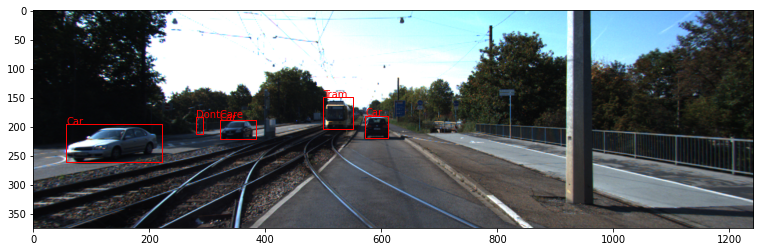

In [6]:
def plot2Dbb(annotations_list, img_name, img_path):
    
    annotations = annotations_list[annotations_list["img_name"]==img_name]
    
    img_path = img_path + img_name + ".png"
    img = plt.imread(img_path)
    plt.figure(figsize=(15, 4))
    plt.imshow(img)
    
    for _, anno in annotations.iterrows():
        _type,left,top,right,bottom = anno["type"],anno["left"],anno["top"],anno["right"],anno["bottom"]
        plt.plot([left,right,right,left,left],
                 [top,top,bottom,bottom,top],
                 color="r",linewidth=1
            )
        plt.text(left, top, _type, color="r")
        
plot2Dbb(annotations_list, img_names[0], img_folder_path)

# 3D plot

In [7]:
def projectToImage(pts3D, P):
    P = np.array(P)
    
    ones = np.ones([1,pts3D.shape[1]])
    pts3D = np.append(pts3D, ones, axis=0)
    pts2D = np.dot(P, pts3D)
    pts2D[0] /= pts2D[2]
    pts2D[1] /= pts2D[2]
    pts2D = np.delete(pts2D, obj=2, axis=0)
    return pts2D

In [8]:
def compute3Dbb(obj, P):
    face_idx = np.array([[1,2,6,5], # front face
                         [2,3,7,6], # left face
                         [3,4,8,7], # back face
                         [4,1,5,8]]) # riht face
    ry = obj["rotation_y"]
    R = np.array([[ np.cos(ry), 0, np.sin(ry)],
                  [          0, 1,          0],
                  [-np.sin(ry), 0, np.cos(ry)]],
                 dtype=np.float)
    l = obj["length"]
    w = obj["width"]
    h = obj["height"]
    corners = np.array([[l/2, l/2, -l/2, -l/2, l/2, l/2, -l/2, -l/2],
                        [0,0,0,0,-h,-h,-h,-h],
                        [w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2, w/2]],
                       dtype=np.float).reshape(3,-1)
    corner3D = np.dot(R,corners)
    xyz = np.array([obj["x"], obj["y"], obj["z"]], dtype=np.float).reshape([3,1])
    corner3D += xyz
    
    if any(corner3D[2,:]<0.1):
        corner2D = []
    else:
        corner2D = projectToImage(corner3D, P);
    
    return corner2D, face_idx

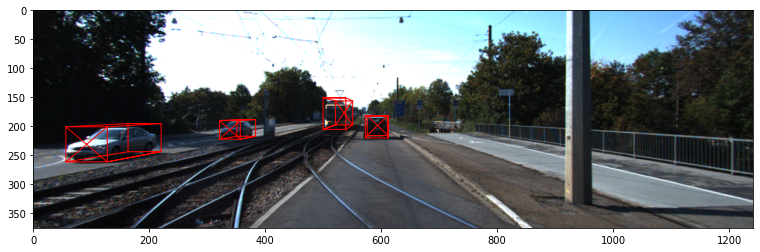

In [18]:
def plot3Dbb(annotations_list, img_name, img_path, calib_path):
    
    annotations = annotations_list[annotations_list["img_name"]==img_name]
    
    img_path = img_path + img_name + ".png"
    img = plt.imread(img_path)
    plt.figure(figsize=(15, 4))
    plt.imshow(img)
    
    _, _, P2, _, _, _, _ = readCalib(img_name, calib_path)
    
    for _, anno in annotations.iterrows():
        if anno["type"] == "DontCare":
            continue
        corner2D, face_idx = compute3Dbb(anno, P2)
        if len(corner2D)==0:
            continue
        plt.plot(corner2D[0,[2,3,0,1,2,6,7,4,5,6,7,3,0,5,1,4,0]],
                 corner2D[1,[2,3,0,1,2,6,7,4,5,6,7,3,0,5,1,4,0]],
                 color="r",linewidth=1)
    
    plt.xlim([0,img.shape[1]])
    plt.ylim([img.shape[0],0])

plot3Dbb(annotations_list, img_names[0], img_folder_path, calib_folder_path)

# data augumentation

In [10]:
def data_augumentation(Corner2D_list, img):
    
    img_width, img_height = img.shape[1], img.shape[0]
    # 左右反転
    fliplr = rand()>.5
    if fliplr:
        img = img[:,::-1]
    # 上下反転
    fliptb = rand()>.7
    if fliptb:
        img = img[::-1]
    # 回転
    min0_5 = min(img_width, img_height)/2
    rotcenter_x = randint(min0_5, img_width-min0_5+1)
    rotcenter_y = randint(min0_5, img_height-min0_5+1)
    rotcenter = (rotcenter_x,rotcenter_y)
    rotangle = (ranf()-0.5)*40
    trans = cv2.getRotationMatrix2D(rotcenter, rotangle , 1)
    img = cv2.warpAffine(img, trans, (img.shape[1],img.shape[0]))
    # 拡大縮小、平行移動
    scale = rand()*.2+1
    aspect_ratio = rand()*(2-2/scale)+1/scale
    fx = scale*(1+aspect_ratio)
    fy = scale
    resized_img = cv2.resize(img, dsize=None, fx=fx, fy=fy)
    resized_img_shape = resized_img.shape
    range_dx = resized_img_shape[1] - img_width
    range_dy = resized_img_shape[0] - img_height
    try:
        dx = randint(0,range_dx)
        dy = randint(0,range_dy)
    except:
        dx = 0
        dy = 0
    img = resized_img[dy:dy+img_height,dx:dx+img_width]
    
    #############################
    rotangle *= np.pi/180
    R = np.array([[np.cos(rotangle), -np.sin(rotangle)],[np.sin(rotangle), np.cos(rotangle)]])
    for i in range(len(Corner2D_list)):
        Corner2D = Corner2D_list[i]
        # 左右反転
        if fliplr:
            Corner2D[0] = img.shape[1] - Corner2D[0]
        # 上下反転
        if fliptb:
            Corner2D[1] = img.shape[0] - Corner2D[1]
        # 回転
        Corner2D = Corner2D.T
        Corner2D = np.dot(Corner2D-np.array(rotcenter), R) + np.array(rotcenter)
        Corner2D = Corner2D.T
        # 拡大縮小、平行移動
        Corner2D[0] = Corner2D[0] * fx - dx
        Corner2D[1] = Corner2D[1] * fy - dy
        Corner2D_list[i] = Corner2D
    return Corner2D_list, img

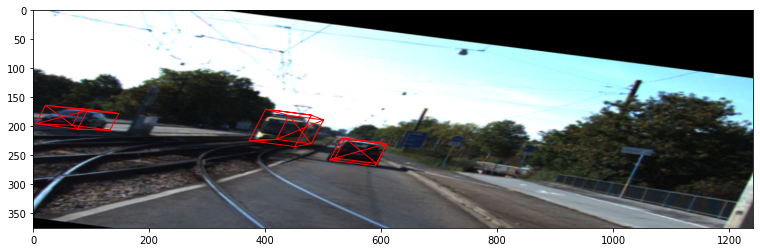

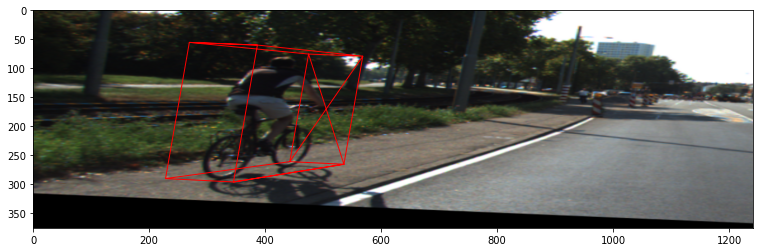

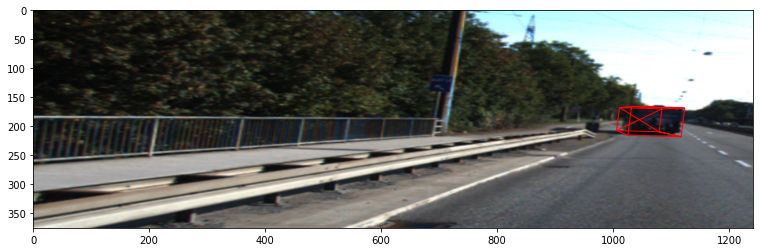

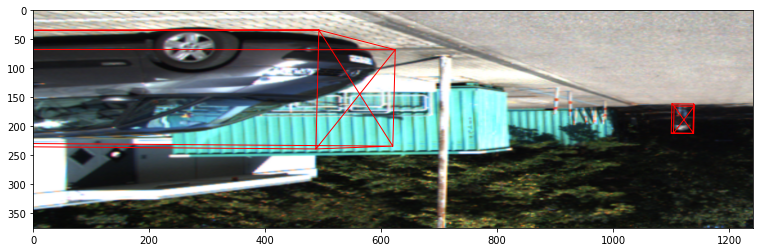

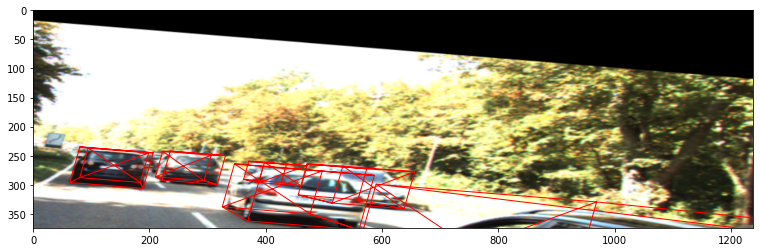

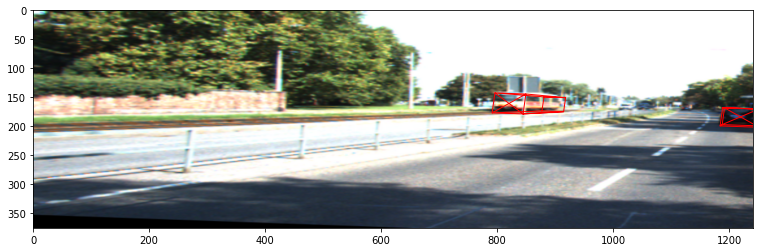

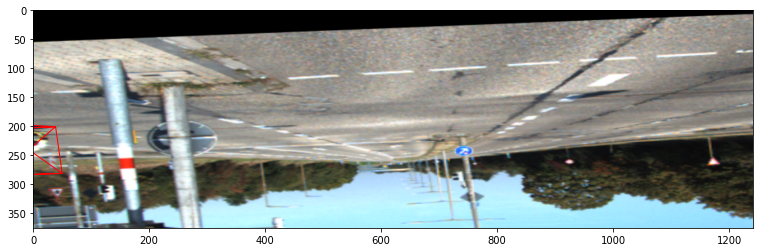

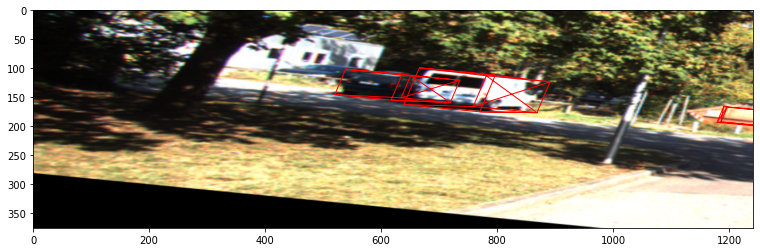

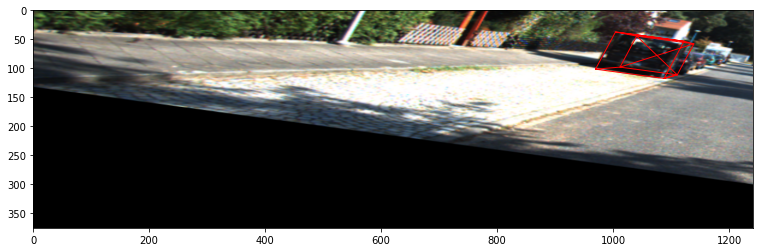

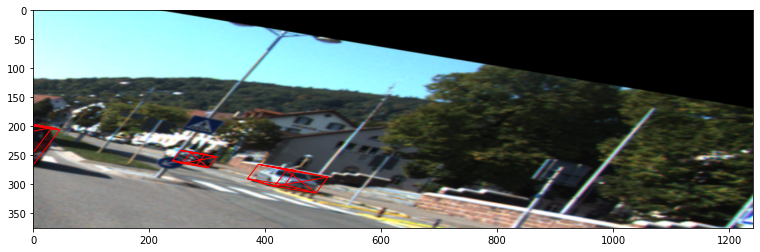

In [13]:
def data_augumentation_check(annotations_list, img_name, img_path, calib_path):
    
    annotations = annotations_list[annotations_list["img_name"]==img_name]
    
    img_path = img_path + img_name + ".png"
    img = plt.imread(img_path)
    
    _, _, P2, _, _, _, _ = readCalib(img_name, calib_path)
    Corner2D_list = []
    
    for _, anno in annotations.iterrows():
        if anno["type"] == "DontCare":
            continue
        corner2D, face_idx = compute3Dbb(anno, P2)
        if len(corner2D)==0:
            continue
        Corner2D_list.append(corner2D)
    
    Corner2D_list, img = data_augumentation(Corner2D_list, img)
    
    plt.figure(figsize=(15, 4))
    plt.imshow(img)
    for i in range(len(Corner2D_list)):
        corner2D = Corner2D_list[i]
        plt.plot(corner2D[0,[2,3,0,1,2,6,7,4,5,6,7,3,0,5,1,4,0]],
                 corner2D[1,[2,3,0,1,2,6,7,4,5,6,7,3,0,5,1,4,0]],
                 color="r",linewidth=1)
    
    plt.xlim([0,img.shape[1]])
    plt.ylim([img.shape[0],0])

for i in range(10):
    data_augumentation_check(annotations_list, img_names[i], img_folder_path, calib_folder_path)